<a href="https://colab.research.google.com/github/luguzman/Masterclass-en-Inteligencia-Artificial/blob/main/Emotion_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


![alt text](https://drive.google.com/uc?id=1AR2fseeE02BLvKP79AIutmBumUDTnLM8)

![alt text](https://drive.google.com/uc?id=14M0CRE2eOemPRVPTyifQJvxc-IDmH5ZA)

![alt text](https://drive.google.com/uc?id=1e-TS-JlOplK9HYEoQSYonHlRGWlyMA4O)

![alt text](https://drive.google.com/uc?id=1D61l-Lo_agZBo3lJaOPX-9IxtxUwh6u2)


Fuente: https://www.kaggle.com/c/facial-keypoints-detection/overview

Fuente: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


# PARTE 1. DETECCIÓN DE PUNTOS FACIALES CLAVES

![alt text](https://drive.google.com/uc?id=1IMU3Ja8JH1Yb4VtEW3t-h90rqYnVaQQZ)

![alt text](https://drive.google.com/uc?id=1FjsnBgcwYthJAzZ-S70tiDaMSPIrjI3L)

# TAREA #2: IMPORTAR LIBRERÍAS Y DATASETS

In [61]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%cd /content/drive/MyDrive/Proyectos/Modern AI/Emotion AI

/content/drive/MyDrive/Proyectos/Modern AI/Emotion AI


In [4]:
# Importamos los paquetes necesarios

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow         # Para poder trabajar en conconancia con opencv

In [5]:
# Cargamos los puntos faciales clave
keyfacial_df = pd.read_csv('/content/drive/MyDrive/Proyectos/Modern AI/Emotion AI/data.csv')

In [5]:
keyfacial_df

left_eye_center_x  ...                                              Image
0             66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1             64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2             65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3             65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4             66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...
...                 ...  ...                                                ...
2135          67.180378  ...  191 191 191 190 189 185 184 120 54 34 19 24 31...
2136          65.724490  ...  19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137          68.430866  ...  31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138          64.152180  ...  7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139          66.683755  ...  68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...

[2140 rows x 31 columns]

In [6]:
# Obtenemos información relevante del dataset 
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [7]:
# Comprobamos si hay valores nulos en el dataset 
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [8]:
keyfacial_df['Image'].shape

(2140,)

In [6]:
# Dado que los valores para la imagen se dan como cadenas separadas por espacios, separamos los valores usando ' ' como separador.
# Luego convertimos esto en una matriz numérica usando np.fromstring y convierta la matriz 1D obtenida en una matriz 2D de forma (96, 96)
# ya que 96x96 es el tamaño que tienen las imágenes.
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))
# x: es cada una de las entradas recordemos que los valores de image están en formato string. Lo que hacemos aquí es tomar ese número largo,
# y lo partimos por espacios en blanco y los pasaremos a tipo entero

In [7]:
# Obtain the Shape of the image
keyfacial_df['Image'][0].shape

(96, 96)

MINI RETO #1:
- Obtenga los valores promedio, mínimo y máximo para `right_eye_center_x`.

In [ ]:
keyfacial_df.describe()

left_eye_center_x  ...  mouth_center_bottom_lip_y
count        2140.000000  ...                2140.000000
mean           66.221549  ...                  82.630412
std             2.087683  ...                   4.813557
min            47.835757  ...                  57.232296
25%            65.046300  ...                  79.417480
50%            66.129065  ...                  82.388899
75%            67.332093  ...                  85.697976
max            78.013082  ...                  95.808983

[8 rows x 30 columns]

# TAREA #3: VISUALIZACIÓN DE IMÁGENES


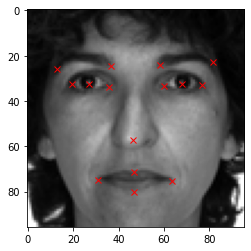

In [11]:
# Representamos una imagen aleatoria del conjunto de datos junto con puntos clave faciales.
# Los datos de la imagen se obtienen de df ['Image'] y se representan usando plt.imshow
# 15 coordenadas x e y para la imagen correspondiente
# Dado que las coordenadas x están en columnas pares como 0,2,4, .. y las coordenadas y están en columnas impares como 1,3,5, ..
# Accedemos a su valor usando el comando .loc, que obtiene los valores de las coordenadas de la imagen en función de la columna a la que se refiere.

i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


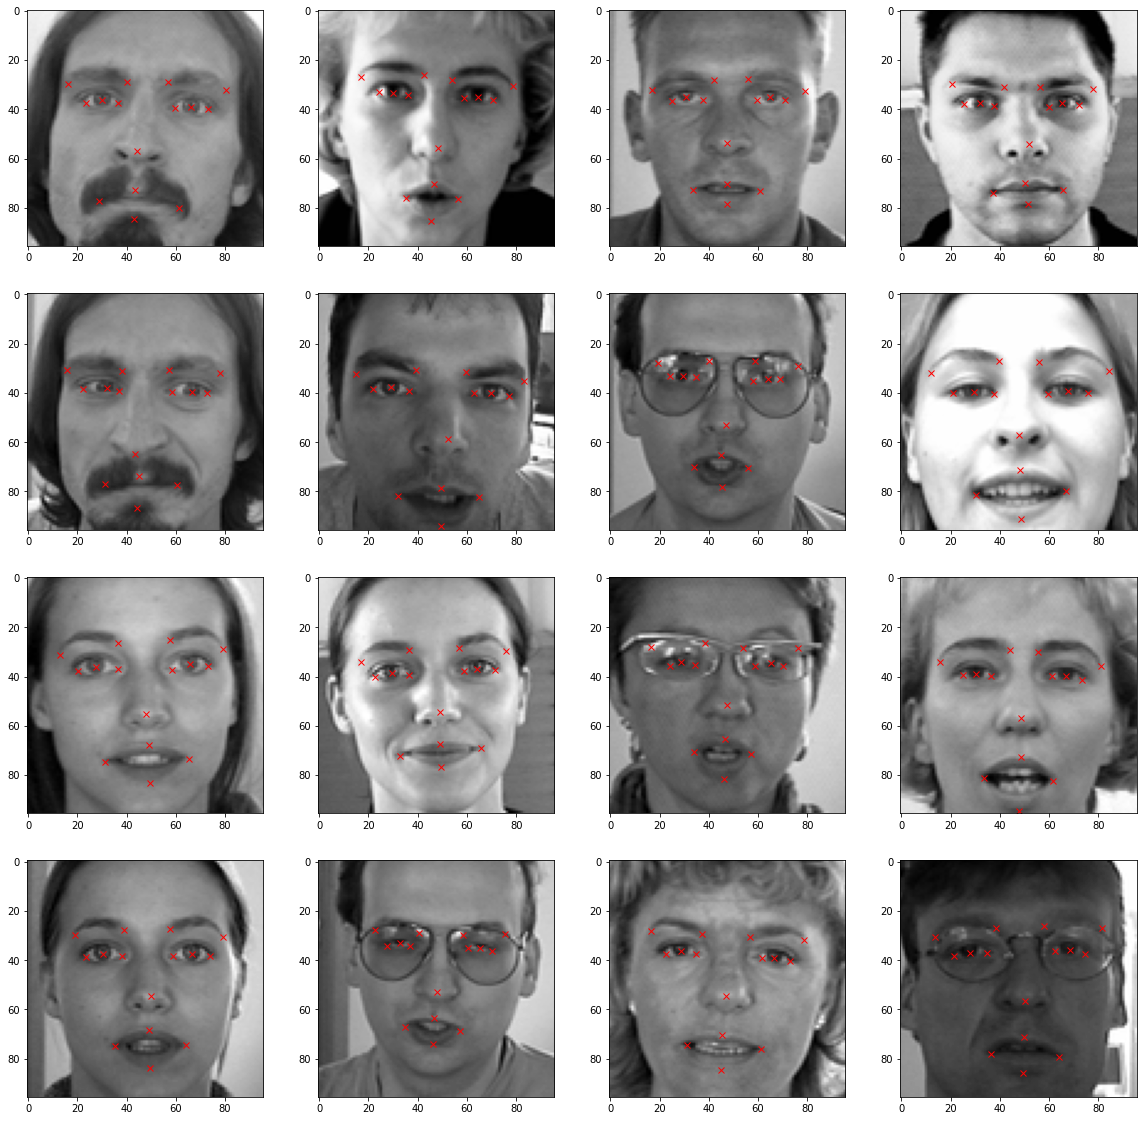

In [12]:
# Veamos más imágenes en formato matricial
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)   # Definimos que pintaremos en 4 filas y 4 columnas y que la imagen con la que empiezo es la i + 1(debe ser consecutivo)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')
    

MINI RETO #2: 
- Realiza una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes junto con sus puntos clave correspondientes

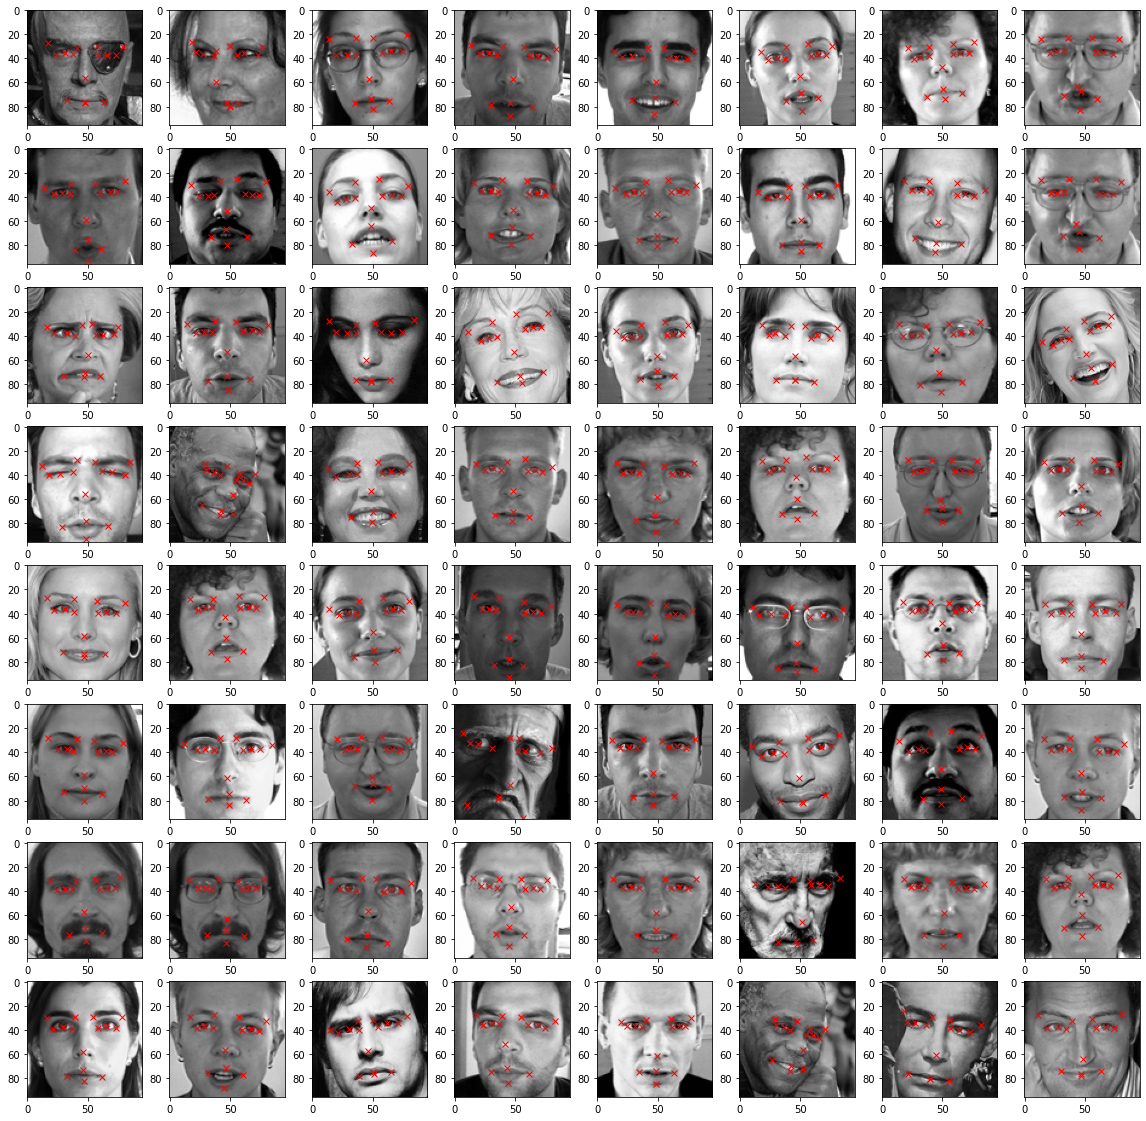

In [14]:
import random

fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)    
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')
    

# TAREA #4: AUMENTACIÓN DE LAS IMÁGENES

La aumentación es para crear un dataset adicional que en lugar de que utilice únicamente los datos del dataset de entrada que hemos cargado, vamos a llevar nuestras habilidades al siguiente nivel porque vamos a tomar las imágenes que tenemos y las vamos a girar un poco. Vamos a hacer un flip horizontal o vertical, vamos a incrementar o reducir el brillo, haciendo que la imagen sea un poco más obscura. También vamos a hacer un poco de zoom. Todo esto para que el modelo sea capaz de generalizar. Así si la persona tiene una posición diferente en la imagen a con las que tenemos incialmente el modelo pueda detectarlo. La cuestión del brillo para queel modelo pueda funcionar siendo de día o de noche etc.

In [8]:
# Creamos una copia del dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [9]:
# Obtenemos las columnas del dataframe menos la columna de las imágenes.

columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [10]:
# Horizontal Flip - Damos la vuelta a las imágenes entorno al eje y
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1)) # axis = 1: entorno al eje de las 'y'

# dado que estamos volteando horizontalmente, los valores de la coordenadas 'y' serían los mismos
# Solo cambiarían los valores de la coordenadas 'x', todo lo que tenemos que hacer es restar nuestros 
# valores iniciales de la coordenada 'x' del ancho de la imagen (96)
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) ) # Ya que recordemos que las imágenes son de 96x96

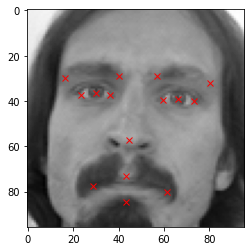

In [18]:
# Mostramos la imagen original
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

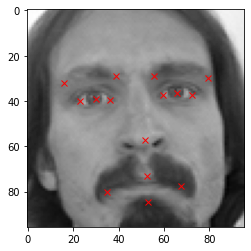

In [19]:
# Mostramos la imagen girada horizontalmente
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [11]:
# Concatenamos el dataset original con el dataframe aumentado
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [21]:
augmented_df.shape

(4280, 31)

In [12]:
# Aumentar aleatoriamente el brillo de las imágenes
# Multiplicamos los valores de los píxeles por valores aleatorios entre 1,5 y 2 para aumentar el brillo de la imagen
# Recortamos el valor entre 0 y 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))  # Leer *
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

# Dado que multiplicaremos el valor del pixel necesitos asegurar que este entre 0 y 255 podría pasar que tenemos un pixel con mucha luz(250) y 
# lo multipliquemos por 1.5 pues se saldría del rango entonces hacemos dos cosas aquí: 1.- multiplicamos x * un valor equiprobable entre 1.5 y 2
# pues estamos usando una distribución uniforme. 
# np.clip: Me hará un recorte (crop) para mantener los valores de la imágen entre un valor mínimo 0 y 255 de brillo 

(6420, 31)

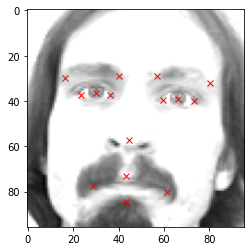

In [23]:
# Mostramos la imagen con el brillo aumentado 

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

MINI RETO #3:
- Aumenta las imágenes volteándolas verticalmente (Sugerencia: voltea a lo largo del eje x y ten en cuenta que si lo hacemos a lo largo del eje x, las coordenadas x no cambiarán)

In [13]:
keyfacial_df_copy = copy.copy(keyfacial_df)

In [14]:
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0)) # axis = 0: entorno al eje de las 'x'

for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

MINI RETO #4:
- Haz una comprobación adicional y visualiza las imágenes.

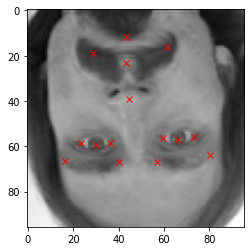

In [26]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

# TAREA #5: NORMALIZACIÓN DE LOS DATOS Y PREPARACIÓN PARA EL ENTRENAMIENTO

In [15]:
# Obtenemos el valor de las imágenes que está presente en la columna 31 (dado que el índice comienza desde 0, nos referimos a la columna 31 por 30 en Python)
img = augmented_df[:,30]

# Normalizamos las imágenes 
img = img/255.

# Creamos un array vacío de tamaño (x, 96, 96, 1) para subministrar al modelo
X = np.empty((len(img), 96, 96, 1)) # 1: hace referencia a un canal de colo. En este caso tenemos imagenes en balnco y negro

# Iteramos sobre la lista de imágenes y añadimos las nuevas al array vacío tras expandir su dimensión de (96, 96) a (96, 96, 1)
# ya que tf necesita una estructura especifica 1 en profundidad
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2) # Para la posición i de la nueva dimensión y las otras 3 dimensiones la de columna, profundidad y la 4° que no sé como imaginarla 
  # lo que hacemos es copiar el valor de esta imágen pasada a 3 dimensiones. Entonces, lo que estamos haciendo es convertir la imágen en formato 
  # de lote especial que la va ir bien a tf de modo que x en la posición i será una imágen con 3 dimensiones gracias a la cual vamos a poder 
  # crear los lotes del conjunto de entrenamiento

# Convertimos el tipo array a float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [16]:
# Obtenemos el valor de las coordenadas x & y que se utilizarán como target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [17]:
# Dividimos los datos en entrenamiento y testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

MINI RETO #5: 
- Intenta usar un valor diferente para `test_size` y verifica que la división es correcta.

In [30]:
X_train.shape

(5136, 96, 96, 1)

In [31]:
X_test.shape

(1284, 96, 96, 1)

# TAREA #6: ENTENDER LA TEORÍA E INTUICIÓN DETRÁS DE LAS REDES NEURONALES

![alt text](https://drive.google.com/uc?id=1E-hJFxIjPSgQfZgQvooa1YVmAx-pFhrc)

![alt text](https://drive.google.com/uc?id=1BY96KuWq3ugAaGXGv2iij2kDlK5rveHe)

MINI RETO #6: 
- Lista almenos 3 funciones diferentes de activación e indica cuál es el tipo preferido para usar en las capas ocultas.¡

![alt text](https://drive.google.com/uc?id=1IXblu0IO-0_JX9iXeRolxlfV9EgrC2Li)

MINI RETO #7: 
- Lista almenos 3 redes neuronales diferentes y sus respectivas aplicaciones.

# TAREA #7: ENTENDER EL ENTRENAMIENDO EN REDES Y LOS ALGORITMOS DE GRADIENTE DESCENDENTE

![alt text](https://drive.google.com/uc?id=1_gqDWFp8yxcMORywHD5BpqJdTqzAyfUr)

![alt text](https://drive.google.com/uc?id=1lKbftYl6MTfyNha0GLFQAF56Mbai2xAh)

![alt text](https://drive.google.com/uc?id=1pMTlXBupNYQVb9PGzU0Y1gNpoX18Zyog)

![alt text](https://drive.google.com/uc?id=1HVHA3DTrCjEa2Z6EL5JAHPgilBTTyxA9)

![alt text](https://drive.google.com/uc?id=1DP05EPIqUmRxaTnx4HoaLZGjPZnoRa0N)

MINI RETO #8: 
- ¿Qué ocurre cuando configuramos el ratio de aprendizaje a los valores extremos (i.e: valores muy pequeños y muy grandes)? ¿Cómo se puede conseguir el mejor resultado de ambos escenarios?

# TAREA #8: ENTENDER LA TEORÍA E INTUICIÓN DETRÁS DE LAS REDES NEURONALES CONVOLUCIONALES Y RESNETS

![alt text](https://drive.google.com/uc?id=1MyP2gNs5cGoPpwygKYiQoQoDjRfaNe3L)

![alt text](https://drive.google.com/uc?id=1nVMlRrisFq4_pSxCwm8SVNiANJTmX0-b)

![alt text](https://drive.google.com/uc?id=1we_JB96LvF1r6PC995FNm3M-YzA3fAyI)

![alt text](https://drive.google.com/uc?id=1AkCcwPFXQnpaZKsnePwIIXxCV3Pw6YSw)

MINI RETO #9: 
- ¿Cual es la eficacia de las ResNets comparada con AlexNet en datasets de ImageNet?

# TAREA #9: CONSTRUIR UN MODELO DE RED NEURONAL RESIDUAL PROFUNDA PARA CREAR UN MODELO QUE DETECTE PUNTOS FACIALES CLAVE

In [ ]:
def res_block(X, filter, stage):

  # Bloque Convolucional
  X_copy = X # Hacemos una copia de la entrada ya que una tiene que tomar el camino principal y la otra el secundario

  f1 , f2, f3 = filter  # Son las 3 dimensiones del filtro que vamos a aplicar (Con2D).

  # Camino Principal del bloque convolucional
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto; observemos que le aplicamos el filtro f3 que corresponde al último filtro que aplicamos en el bloque convolucional
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [18]:
def res_block2(X, filter, stage):

  # Bloque Convolucional
  X_copy = X # Hacemos una copia de la entrada ya que una tiene que tomar el camino principal y la otra el secundario

  f1 , f2, f3 = filter  # Son las 3 dimensiones del filtro que vamos a aplicar (Con2D).

  # Camino Principal del bloque convolucional
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

#   X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
#   X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto; observemos que le aplicamos el filtro f3 que corresponde al último filtro que aplicamos en el bloque convolucional
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  # agregada:
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)

  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [49]:
input_shape = (96, 96, 1)   # Definimos el tamaño de la entrada

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2) # stage: recordemos que es para asignar un nombre

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
# X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)   # ya que queremos predecir las 30 coordenadas: 15x15 ('15x', '15y') de donde están los puntos clave de la cara


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

MINI RETO #10:
- Experimenta cambiando la arquitectura de la red eliminando 2 capas MaxPooling del Bloque Res y entrena el modelo de nuevo
- Intenta agregar el bloque `X = res_block (X, filter = [256,256,1024], stage = 4)` después del bloque de la etapa # 3.
- ¿Qué observas? Comenta tu respuesta

# TAREA #10: COMPILAR Y ENTRENAR EL MODELO DE DEEP LEARNING PARA LA DETECCIÓN DE PUNTOS FACIALES CLAVE

In [50]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False) # amsgrad:variante expuesta en 2018 del gradiente descendente
# Si se desea conocer más respecto a los parámetros visitar https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])
# Comprueba más sobre el Optimizador Adam en : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [51]:
# Usamos la parada temprana para salir del entenamiento si el error de validación
# no decrece después de cierto número de epochs (paciencia) 
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)


# Guardamos el mejor modelo con mejor error de validación 
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)
# save_best_only: Guardará la mejor versión obtenida del modelo hasta el momento en cada epoch

In [57]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 256, epochs = 5, validation_split = 0.1, callbacks=[checkpointer, earlystopping])
# validation_split: En este caso se usa un para hacer la presición también en la fese de entrenamiento.

Epoch 1/5
19/19 [==============================] - 1s 66ms/step - loss: 18.8197 - accuracy: 0.5794 - val_loss: 318.7360 - val_accuracy: 0.6089

Epoch 00001: val_loss improved from 347.33047 to 318.73596, saving model to FacialKeyPoints_weights.hdf5
Epoch 2/5
19/19 [==============================] - 1s 63ms/step - loss: 17.8730 - accuracy: 0.5675 - val_loss: 325.6362 - val_accuracy: 0.5817

Epoch 00002: val_loss did not improve from 318.73596
Epoch 3/5
19/19 [==============================] - 1s 63ms/step - loss: 17.1145 - accuracy: 0.5764 - val_loss: 223.4964 - val_accuracy: 0.6751

Epoch 00003: val_loss improved from 318.73596 to 223.49637, saving model to FacialKeyPoints_weights.hdf5
Epoch 4/5
19/19 [==============================] - 1s 63ms/step - loss: 20.9777 - accuracy: 0.5807 - val_loss: 298.0403 - val_accuracy: 0.5953

Epoch 00004: val_loss did not improve from 223.49637
Epoch 5/5
19/19 [==============================] - 1s 63ms/step - loss: 17.7715 - accuracy: 0.5848 - val_los

In [37]:
# Guardamos la arquitectura del modelo en un JSON para luego usarlo

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


MINI RETO #11:
- Experimenta cambiando el tamaño del lote y el valor de   validation split value y vuelve a entrenar el modelo 

# TAREA #11: EVALUAR LA EFICACIA DEL MODELO DE DETECCIÓN DE PUNTOS FACIALES CLAVE ENTRENADO

In [64]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Cargar la arquitectura del modelo
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [65]:
# Evaluar el modelo

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 1s 6ms/step - loss: 9.2321 - accuracy: 0.8504
Accuracy : 0.8450155854225159


In [ ]:
# Obtenemos las claves del modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

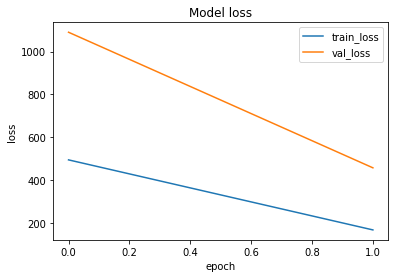

In [ ]:
# Representamos los scores del entrenamiento

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# PARTE 2. DETECCIÓN DE LAS EXPRESIONES FACIALES

![alt text](https://drive.google.com/uc?id=1yVo-spGYRjUqKgKohd9WDOs1Ws_TKJId)

![alt text](https://drive.google.com/uc?id=1yv_Nm6elYnuNP-tFr2AuIU_kyENEh-Ek)

# TAREA #12: IMPORTAR & EXPLORAR EL DATASET PARA LA DETECCIÓN DE EXPRESIONES FACIALES

In [ ]:
# Leemos el CSV para los datos de expresiones faciales
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [ ]:
facialexpression_df[' pixels'][0] # Formato String

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# Función para convertir valores de píxel de formato string a formato array 

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32') # Tensor tridimensional con profundidad = 1

In [ ]:
# Redimensionamos la imagen de (48, 48) a (96, 96) ya que el primer modelo trabaja con imagenes de 96x96

def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC) # interpolation: metodo para expandir la imágen
# En este caso lo que hará es una interpolación que básicamente significa que va añadir un punto en medio y ese pixel de en medio interpolará a 
# los valores con un explain cúbico, en este caso entre los dos píxeles vecinos.

In [ ]:
# Por tanto, primera conversión de un string largo a un array bidimensional de números en float32
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [ ]:
# Comprobamos la estructura del data frame
facialexpression_df.shape

(24568, 2)

In [ ]:
# Miramos si hay valores nulos en el data frame 
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
label_to_text = {0:'Ira', 1:'Odio', 2:'Tristeza', 3:'Felicidad', 4: 'Sorpresa'}

MINI RETO #12: 
- Visualizar la primera imagen del data frame y ver que la imagen no se distorsiona al cambiar el tamaño o debido a las operaciones de remodelación

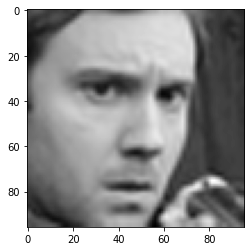

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

# TAREA #13: VISUALIZAR LAS IMÁGENES Y MOSTRAR LAS ETIQUETAS

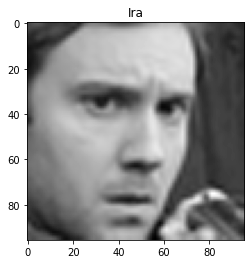

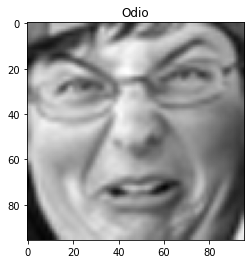

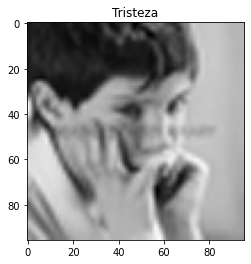

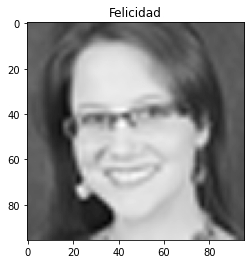

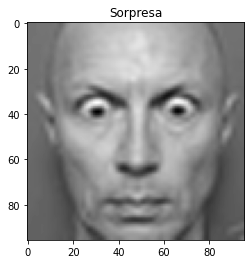

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96) # Duda: según yo esto ya no es necesario ya que ya hicimos el reshape
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

MINI RETO #13: 
- Representar un gráfico de barras para averiguar cuántas muestras (imágenes) están presentes por cada emoción

In [ ]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [ ]:
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

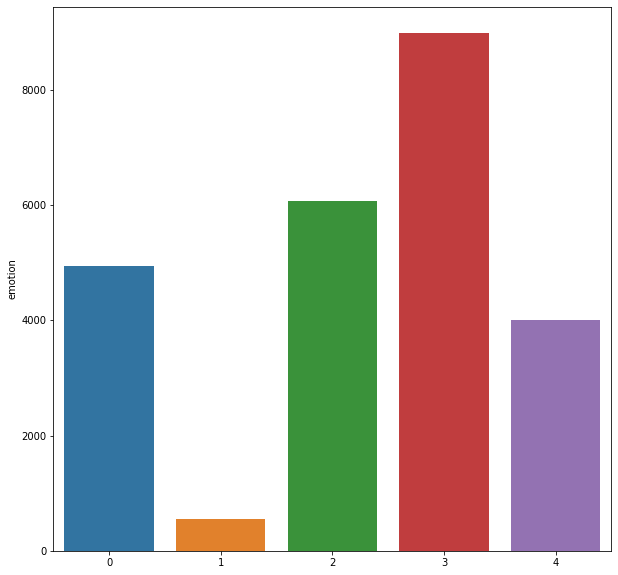

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

# TAREA #14: PREPARACIÓN DE LOS DATOS Y AUMENTACIÓN DE LAS IMÁGENES

In [ ]:
# Dividir el dataframe en características y etiquetas para la clasificación
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


In [ ]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
X.shape

(24568,)

In [ ]:
# Observemos con X.shape que la dimensión de las imágemnes no esta bien definida y nosotros necesitemos que si lo este para decirla a la input layer el tamaño de la entrada
X = np.stack(X, axis = 0) # Le decimos: apilame en el axis = 0 (24568) toda la información Lo que juntaría todas la imágenes en una pila enorme, enorme de datos
X = X.reshape(24568, 96, 96, 1) # Una vez apilado redimensionamos

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# Dividir el dataframe en conjunto de entrenamiento, test y validación 

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [ ]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [ ]:
print(X_train.shape, y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [ ]:
# Pre Procesado de Imágenes 
# Normalizamos los valores

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
X_train

array([[[[0.17293361],
         [0.1909842 ],
         [0.21835561],
         ...,
         [0.28930587],
         [0.29017365],
         [0.29008782]],

        [[0.18903019],
         [0.21777888],
         [0.26329184],
         ...,
         [0.29535234],
         [0.29014236],
         [0.28643513]],

        [[0.21387221],
         [0.26058474],
         [0.33653942],
         ...,
         [0.30553707],
         [0.29015693],
         [0.2803881 ]],

        ...,

        [[0.55651456],
         [0.5564969 ],
         [0.55651724],
         ...,
         [0.74500334],
         [0.7329046 ],
         [0.72632116]],

        [[0.5514389 ],
         [0.5507124 ],
         [0.54959875],
         ...,
         [0.754738  ],
         [0.7348624 ],
         [0.723624  ]],

        [[0.548236  ],
         [0.5470869 ],
         [0.54529667],
         ...,
         [0.76071644],
         [0.7360082 ],
         [0.721876  ]]],


       [[[0.34027502],
         [0.37349302],
         [0.42

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,            # Para rotar las imágenes hasta 15° como máximo
    width_shift_range = 0.1,        # Para despalzar hacia la izquierda hasta un 10% del tamaño de la imágen.
    height_shift_range = 0.1,       # Para despalzar hacia la derecha hasta un 10% del tamaño de la imágen.
    shear_range = 0.1,              # Rotación con respecto a los ángulos
    zoom_range = 0.1,               # Para hacer un zoom de hasta el 10% del tamaño orignal de la imagen
    horizontal_flip = True,         # Desplazar hacia un lado u otro 
    vertical_flip = True,
    brightness_range = [1.1, 1.5],  # 
    fill_mode = "nearest")          # Modo para para rellenar los píxeles de las traslaciones verticales, horizontales, en este caso copiando el más cercano.


MINI RETO #14: 
- Intenta almenos dos técnicas de aumentación de datos adicionales 

# TAREA #15: CONSTRUYE Y ENTRENA UN MODELO DE DEEP LEARNING PARA LA CLASIFICACIÓN DE EXPRESIONES FACIALES 

In [ ]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - Fase
# Aplicamos una capa de convolución con 64 filtros de(7x7)
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# Vamos a enchufarle 2 bloques residuales para evitar el problema del desvanecimiento del gradiente
# 2 - Fase
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - Fase
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling: para simplificar la información y quedarnos con la más relevante 
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
# Entrenar la red 
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Recordemos que el primer modelo de puntos faciales clave se guardó con: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# Usamos la parada temprana para salir del entenamiento si el error de validación
# no decrece después de cierto número de epochs (paciencia) 
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Guardamos el mejor modelo con menor error de validación 
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),  # Utilizamos la fución flow para que nos cree un flujo de imágenes
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64, # steps_per_epoch: No de pasos que haremos en los epochs
	epochs= 2, callbacks=[checkpointer, earlystopping])

Epoch 1/2
345/345 [==============================] - ETA: 0s - loss: 1.3600 - accuracy: 0.4329
Epoch 00001: val_loss improved from inf to 1.78246, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 24s 70ms/step - loss: 1.3600 - accuracy: 0.4329 - val_loss: 1.7825 - val_accuracy: 0.2427
Epoch 2/2
345/345 [==============================] - ETA: 0s - loss: 1.0646 - accuracy: 0.5633
Epoch 00002: val_loss improved from 1.78246 to 1.68959, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 25s 71ms/step - loss: 1.0646 - accuracy: 0.5633 - val_loss: 1.6896 - val_accuracy: 0.2427


In [ ]:
# Guardar la arquitectura del modelo en un JSON para su futuro uso 

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

MINI RETO #15: 
- Experimentar con varios tamaños de lote, paciencia, optimizadores y arquitectura de red para mejorar el rendimiento de la red 

# TAREA #16: ENTENDER CÓMO EVALUAR LOS MODELOS DE CLASIFICACIÓN (MATRIZ DE CONFUSIÓN, ACIERTO, PRECISIÓN Y RECUPERACIÓN)

![alt text](https://drive.google.com/uc?id=1PLEhcqt2wDz3kb7J8Wu04PjCr46RzzFf)

![alt text](https://drive.google.com/uc?id=1OHdC1j_9pvDxjbIpe74f7uWqyeXx0jBf)

![alt text](https://drive.google.com/uc?id=1GKH-OB9z60Lf_LzTa9xo0MeavZhH3yEV)

# TAREA #17: EVALUAR LA EFICACIA DEL MODELO CLASIFICADOR DE EXPRESIONES FACIALES ENTRENADO 

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Cargamos la arquitectura del modelo
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Accuracy en la fase de Test: {}'.format(score[1]))

39/39 [==============================] - 0s 5ms/step - loss: 0.3791 - accuracy: 0.8568
Accuracy en la fase de Test: 0.8567941188812256


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

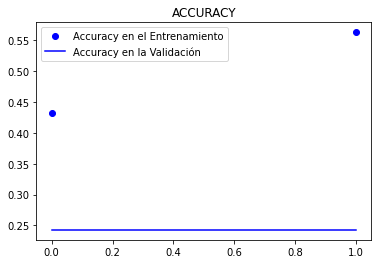

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy en el Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy en la Validación')
plt.title('ACCURACY')
plt.legend()

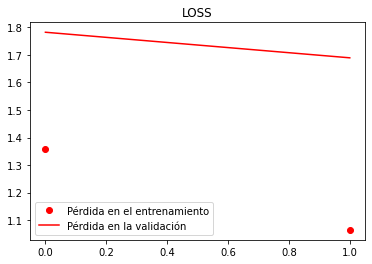

In [ ]:
plt.plot(epochs, loss, 'ro', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('LOSS')
plt.legend()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1) 
y_true = np.argmax(y_Test, axis=-1)
# axis=-1: Para tomar el último eje.Recordemos que voy a obtener para cada imagen (primer eje), 
# un vector con 5 probabilidades -> segundo eje (útlimo eje)

In [ ]:
y_true.shape

(1229,)

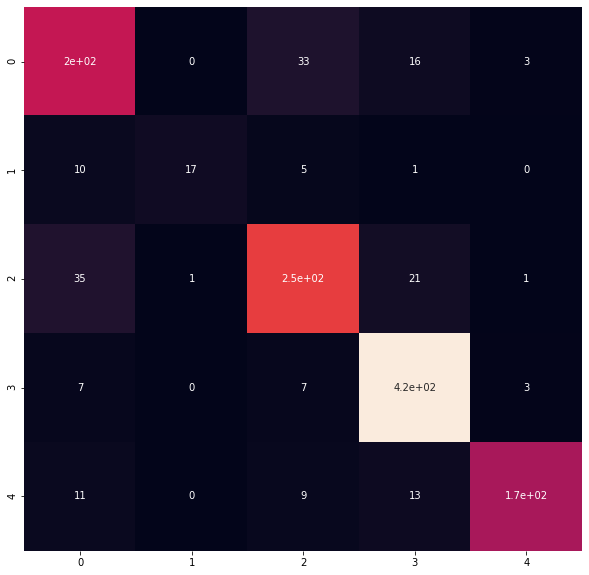

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)
# annot = True: Es para que en cada cuadrito se vea exactamente el número de observaciones 
# cbar = False: Es para que no pinte la barra de color a lado que nos quita espacio 

MINI RETO #16: 
- Mostrar una matriz de 25 imágenes junto con su etiqueta predicha / verdadera
- Mostrar el informe de clasificación y analizar la precisión y la recuperación

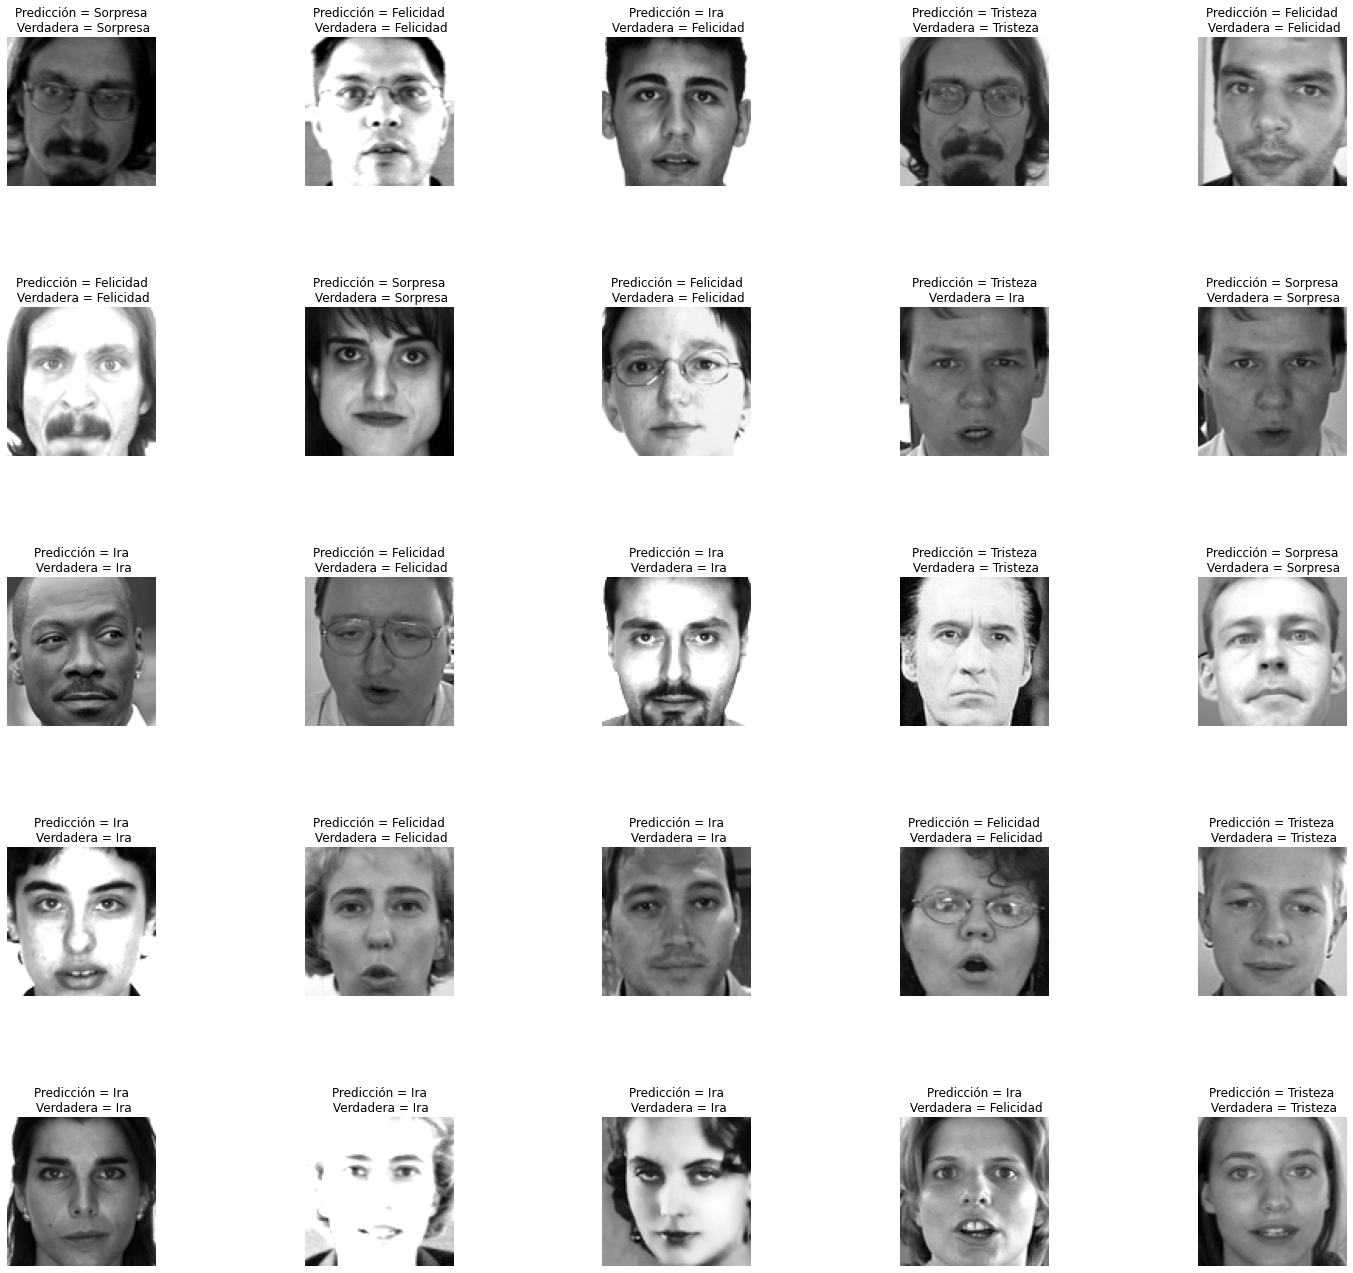

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel() #Truquito para aplanar los ejes. En lugar de pintar en 1° fila y 1° columna , 1° fila 2° columna, etc. Lo que hago es 
# apalanar esas filas y columnas en un vector de 25 posiciones y así cada imagen se colocará en la posición adecuada

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off') # Le quitamos al axes los ejes

plt.subplots_adjust(wspace = 1)   # Para que ocupe todo el espacio disponible

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       253
           1       0.94      0.52      0.67        33
           2       0.82      0.81      0.82       306
           3       0.89      0.96      0.92       432
           4       0.96      0.84      0.90       205

    accuracy                           0.86      1229
   macro avg       0.88      0.78      0.82      1229
weighted avg       0.86      0.86      0.86      1229



# PARTE 3. COMBINAR LOS MODELOS DE DETECCIÓN DE PUNTOS CLAVE FACIALES Y DE CLASIFICACIÓN DE EXPRESIONES

# TAREA #18: COMBINAR AMBOS MODELOS (1) DETECCIÓN DE PUNTOS CLAVE FACIALES Y (2) DE EXPRESIONES FACIALES

In [ ]:
def predict(X_test):

  # Hacemos la predicción con el modelo de puntos clave 
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Hacemos la predicción con el modelo de emociones 
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Redimensionamos el array de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertimos las predicciones en un dataframe 
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Añadimos la emoción al dataframe de predicciones 
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

In [ ]:
df_predict.head()

left_eye_center_x  left_eye_center_y  ...  mouth_center_bottom_lip_y  emotion
0          30.849178          34.764919  ...                  83.986137        0
1          66.720764          36.611057  ...                  81.278877        2
2          65.458153          38.728848  ...                  87.905960        2
3          65.313766          38.140209  ...                  83.112114        2
4          72.583893          35.128548  ...                  89.158638        2

[5 rows x 31 columns]

MINI RETO #17: 
- Representamos una matriz de  16 imágenes junto con su emoción predicha y sus puntos faciales.

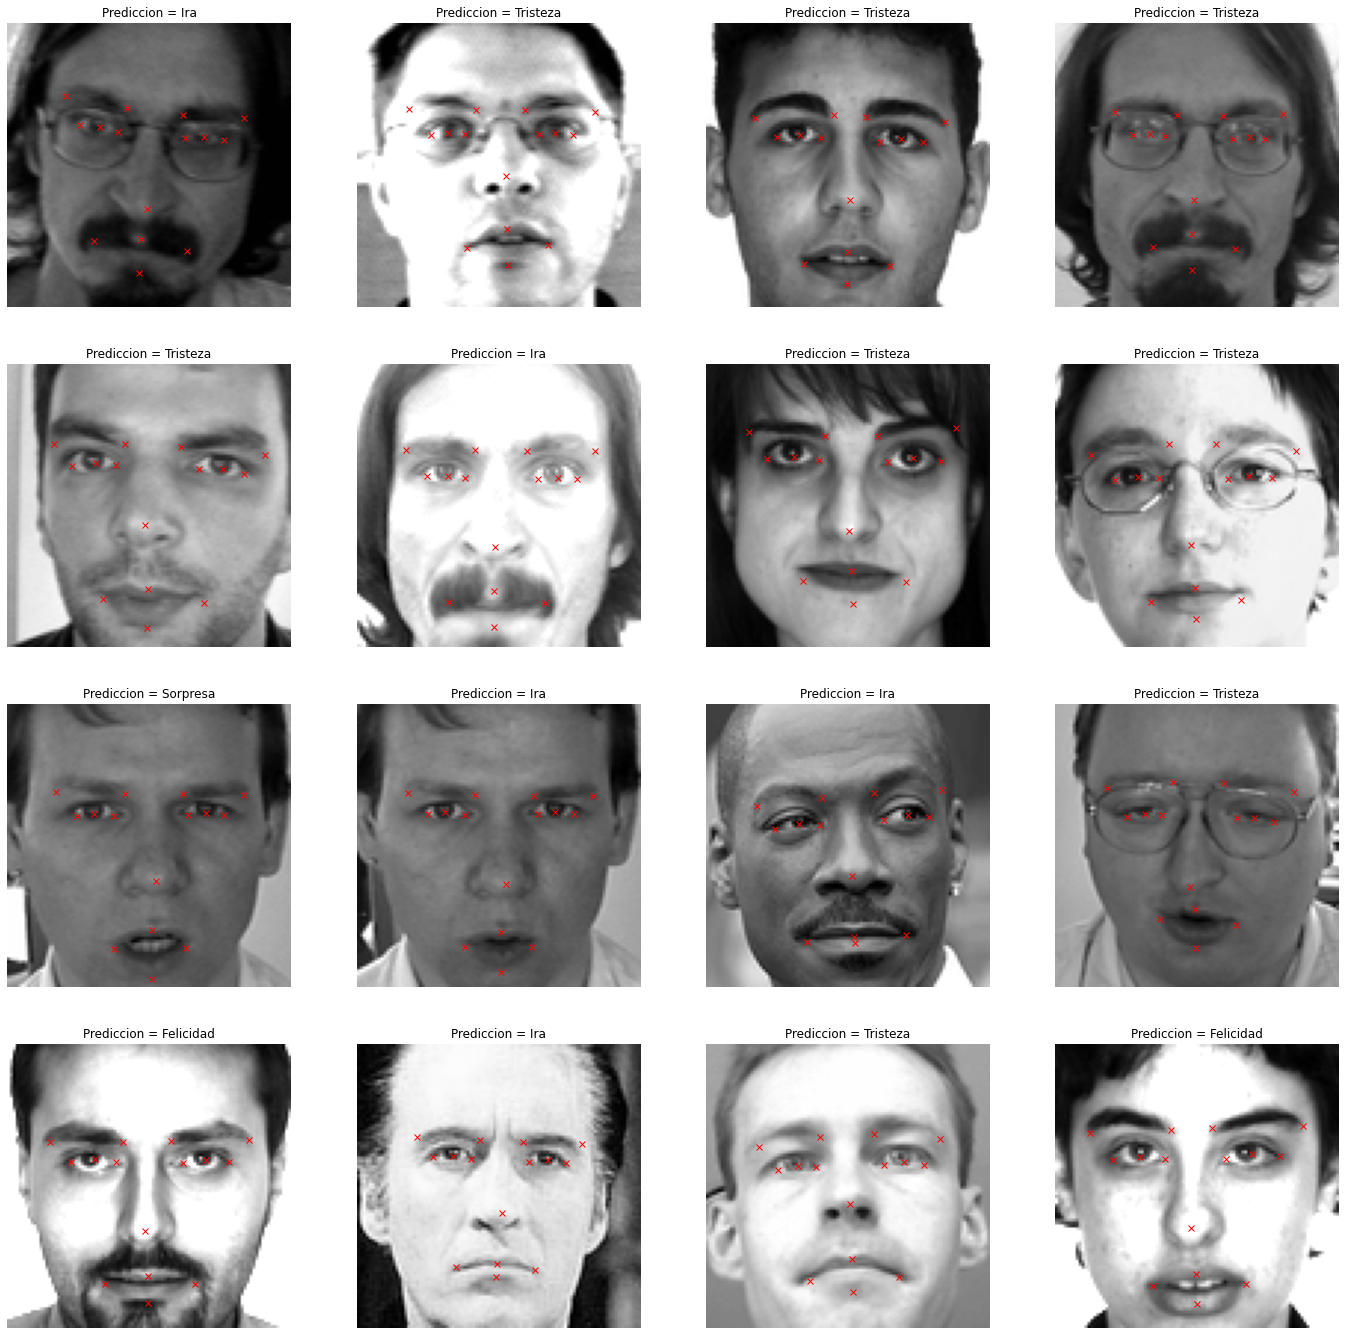

In [ ]:
# Representamos las imágenes de test junto con los puntos clave y emociones

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray') # En lugar del squeeze() podríamos hacer un reshape de 96x96. Lo que hace squeeze() es aplanar la última dimensión.
    axes[i].set_title('Prediccion = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off') # Para que no nos pinte losaxes del dibujo
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            

# PARTE 4. DESPLEGAR LOS DOS MODELOS ENTRENADOS

# TAREA #19. GUARDAR EL MODELO ENTRENADO PARA PUBLICAR

![alt text](https://drive.google.com/uc?id=1DBquDj0ce4Vq9KFX7wS-ldT7enXgVGzS)

![alt text](https://drive.google.com/uc?id=1x14nNobS6eeqAjJVZGLZ8MOcgc-WhSBI)

![alt text](https://drive.google.com/uc?id=1zFJZTRkXHWlYQXPQk90IOZnzMTKVKPt5)

- Ahora necesitamos guardar nuestro modelo entrenado y debe guardarse en un formato `SaveModel`.
- El modelo tendrá un número de versión y se guardará en un directorio estructurado
- `tf.saved_model.save` es una función que se usa para crear un modelo guardado que es adecuado para publicar con Tensorflow Serving.
- Una vez guardado el modelo, ahora podemos usar TensorFlow Serving para comenzar a realizar solicitudes de inferencia utilizando una versión específica de nuestro modelo entrenado "servible".
- Utilizaremos `SavedModel` para guardar y cargar nuestro modelo: variables, el gráfico y los metadatos del gráfico.
          
- Consulte esto para obtener más información:
https://www.tensorflow.org/guide/saved_model

In [ ]:
import json
import tensorflow.keras.backend as K

# Creamos la función para despelegar un modelo en producción.
# directory: directorio donde se guardará y estará el modelo
# model: el modelo en si mismo
def deploy(directory, model):
  MODEL_DIR = directory
  version = 1 

  # Juntamos el directorio del temp model con la versión elegida
  # El resultado será = '\tmp\version number'
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Guardemos el modelo con saved_model.save
  # Si el directorio existe, debemos borrarlo con '!rm' 
  # rm elimina cada fichero especificado usando la consola de comandos. 

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}    # rm: remove, -r: recursivamente para elimiar carpetas

  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR   
  # Declaramos una variable de entorno en el sistema la cual estará asociada al directorio donde se ha guardado el modelo y esto me permitirá 
  # arrancar una instanci ade tf serving que se encargue de hacer la predicción.

# TAREA #20. PUBLICAR EL MODELO CON TENSORFLOW SERVING

In [ ]:
# Agreguemos el paquete tensorflow-model-server a nuestra lista de paquetes
# !echo: cambia la lista de paquetes para que tenga en cuenta que quiero descargar uno que esta en la siguiente url
# las siguientes dos lineas de codigo lo que hacen simplemente es modificar la versión de Linux donde corre nuestro Google Colab para
# que tome la nueva url que esta despues de curl y disponga de ese directorio para que descrague paquetes de el
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14426      0 --:--:-- --:--:-- --:--:-- 14426
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.1 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https

In [ ]:
# Una vez añadido el repo falta instalarlo
# Instalemos tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 3s (82.7 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [ ]:
# Vamos a arrancar TensorFlow serving

- Cargaremos nuestro modelo y comenzaremos a hacer inferencias (predicciones) basadas en él.
- Hay algunos parámetros importantes:

   - `rest_api_port`: el puerto que se usará para las solicitudes REST.
   - `model_name`: lo usaremos en la URL de las solicitudes REST. Puedes elegir cualquier nombre
   - `model_base_path`: esta es la ruta al directorio donde ha guardado el modelo.
  
- Para obtener más información sobre REST, consulta en:
https://www.codecademy.com/articles/what-is-rest
- REST es una variante de las llamadas HTTP en el que los comandos http tienen un significado semántico.

In [ ]:
# Cargamos el modelo de los puntos faciales
deploy('/model', model_1_facialKeyPoints) 

export_path = /model/1

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /model/1/assets


In [ ]:
# %%bash: Invocamos una sentencia de bash. --bg: background en segundo plano para que efectue la ejecución de mi Google Colab.
# Ye este segundo plano fijemonos que lo que hago es arrancar tf model server indicándole los 3 parámetros que habíamos dicho que iban a 
# hacer falta.
%%bash --bg     
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1
# "${MODEL_DIR}": Lo anoto así ya que es una varibale de sistema ya que recordemos que la he declarado en las varibales de entorno y la manera de
# llamar estas variables desde bash es esta, entre comillas dolar y entre llaves. Hasta este punto esto arrancará nuestro tf model server lo que 
# voy ha hacer es escribir en el server log para que se vaya guardando en ese fichero server log, precisamente eso, el log, los registros 
# de la información de ese servidor que arranca correctamente o si hay un error o lo que sea.

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-11-02 12:07:32.198946: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:199] Restoring SavedModel bundle.
2020-11-02 12:07:32.365520: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model/1
2020-11-02 12:07:32.420655: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 287213 microseconds.
2020-11-02 12:07:32.428624: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /model/1/assets.extra/tf_serving_warmup_requests
2020-11-02 12:07:32.428973: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: keypoint_model version: 1}
2020-11-02 12:07:32.431310: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 .

In [ ]:
deploy('/model1', model_2_emotion)

export_path = /model1/1

INFO:tensorflow:Assets written to: /model1/1/assets


In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [ ]:
!tail server.log

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-11-02 12:09:09.134681: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:199] Restoring SavedModel bundle.
2020-11-02 12:09:09.254609: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model1/1
2020-11-02 12:09:09.310216: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 239106 microseconds.
2020-11-02 12:09:09.318033: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /model1/1/assets.extra/tf_serving_warmup_requests
2020-11-02 12:09:09.318429: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: emotion_model version: 1}
2020-11-02 12:09:09.320468: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 

- **¡Felicidades! Ahora hemos cargado con éxito una versión servible de nuestro modelo `{name: keypoint_model version: 1}`**
- **¡Felicidades! Ahora hemos cargado con éxito una versión servible de nuestro modelo `{name: emotion_model version: 1}`**

# TAREA #21: HACER PETICIONES AL MODELO CON TENSORFLOW SERVING

In [ ]:
import json

# Vamos a crear un objeto JSON y hacer 3 predicciones de las 3 primeras imágenes de nuestro conjunto de test
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))
# json.dumps: Basicamente se encarga de convertir la imagen original que tenemos en un formato aceptable para tf serving. Recordemos que 
# para hacer inferecnias necesitamos que los datos vayan en formato json y que el propio modelo será capas de adaptarlos a la entrada necesaria

Data: {"signature_name": "serving_default", "instances": ...  [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]]]}


In [ ]:
!pip install -q requests

In [ ]:
import requests

# Función para hacer predicciones con el modelo publicado
def response(data):
  headers = {"content-type": "application/json"}    # cabecera genérica 
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)
  
  # Redimensión de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertir las predicciones en un dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Añadimos la emoción al dataframe de predicciones 
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
# Hacer una predicción 
df_predict = response(data)

In [ ]:
df_predict

left_eye_center_x  left_eye_center_y  ...  mouth_center_bottom_lip_y  emotion
0          65.261368          37.307972  ...                  83.436600        0
1          30.138720          35.291103  ...                  76.371315        2
2          30.049778          38.493256  ...                  84.687752        2

[3 rows x 31 columns]

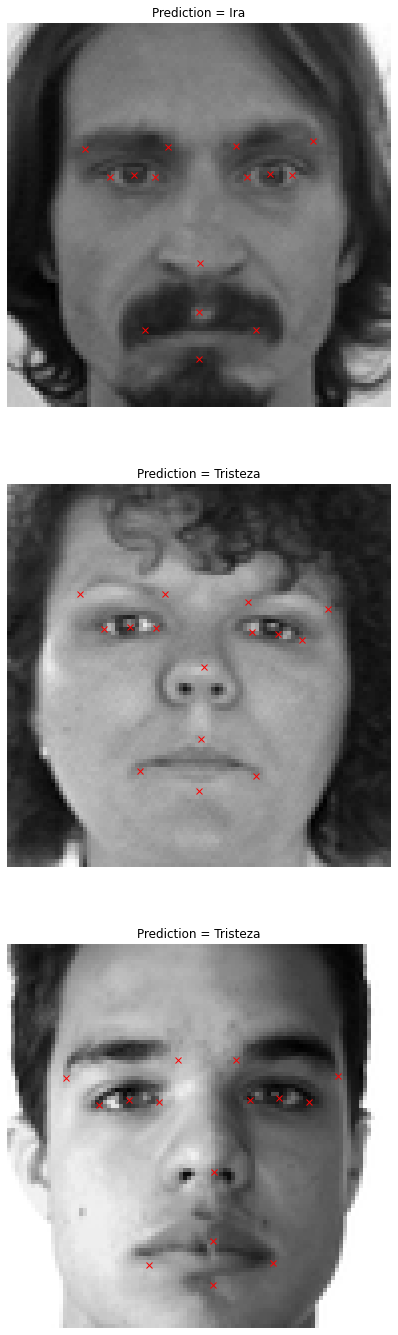

In [ ]:
# Representar las imágenes de test y sus predicciones de puntos clave y emociones 

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            

# ¡EXCELENTE TRABAJO! ¡AHORA TIENES UN SÓLIDO CONOCIMIENTO DE LA EMOTION AI! PUEDES ESTAR SÚPER ORGULLOSO DE TUS HABILIDADES RECIENTEMENTE ADQUIRIDAS :)

# SOLUCIONES A LOS MINI RETOS

MINI RETO #1:
- Obtener los valores promedio, el mínimo y el máximo para `right_eye_center_x`.

In [ ]:
keyfacial_df.describe()

MINI RETO #2: 
- Realiza una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes junto con sus puntos clave correspondientes

In [ ]:
import random
# Veamos más imágenes en formato matricial  
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')
    

MINI RETO #3:
- Aumenta las imágenes volteándolas verticalmente (Sugerencia: voltea a lo largo del eje x y ten en cuenta que si lo hacemos a lo largo del eje x, las coordenadas x no cambiarán)

In [ ]:
keyfacial_df_copy = copy.copy(keyfacial_df)

# Voltear las imágenes alrededor del eje x
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

# Como volteamos verticalmente las coordenadas, los valores de x se quedan igual 
for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

MINI RETO #4:
- Haz una comprobación adicional y visualiza las imágenes.

In [ ]:
# Mostrar la imágen volteada verticalmente 
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

MINI RETO #5: 
- Intenta usar un valor diferente para `test_size` y verifica que la división es correcta.

In [ ]:
print('Tamaño de entrenamiento =', X_train.shape)
print('Tamaño de test =', X_test.shape)

MINI RETO #6: 
- Lista almenos 3 funciones diferentes de activación e indica cuál es el tipo preferido para usar en las capas ocultas.¡

![alt text](https://drive.google.com/uc?id=1G8aJvO6IFxxd7dAdVB1tylWGNcSUM3R4)

![alt text](https://drive.google.com/uc?id=1d4HfwWTawWwpiXYfrADRUGLc0yfJNzoz)

![alt text](https://drive.google.com/uc?id=142wHzaUyjv8185BZS-BisyjQALDOZhSX)

MINI RETO #7: 
- Lista almenos 3 redes neuronales diferentes y sus respectivas aplicaciones.

Un buen recurso de by Aravind Pai: https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/

MINI RETO #8: 
- ¿Qué ocurre cuando configuramos el ratio de aprendizaje a los valores extremos (i.e: valores muy pequeños y muy grandes)? ¿Cómo se puede conseguir el mejor resultado de ambos escenarios?

Un buen recurso de Jason Brownlee: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

MINI RETO #9: 
- ¿Cual es la eficacia de las ResNets comparada con AlexNet en datasets de ImageNet?

https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

MINI RETO #10:
- Experimenta cambiando la arquitectura de la red eliminando 2 capas MaxPooling del Bloque Res y entrena el modelo de nuevo
- Intenta agregar el bloque `X = res_block (X, filter = [256,256,1024], stage = 4)` después del bloque de la etapa # 3.
- ¿Qué observa? Comenta tu respuesta

El número de parámetros entrenables crece significativamente

MINI RETO #11:
- Experimenta cambiando el tamaño del lote y el valor de   validation split value y vuelve a entrenar el modelo 

¡Experimenta! Cambia los valores y observa como mejora. Pon una captura de tus resultados obtenidos

MINI RETO #12: 
- Visualizar la primera imagen del data frame y ver que la imagen no se distorsiona al cambiar el tamaño o debido a las operaciones de remodelación

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

MINI RETO #13: 
- Representar un gráfico de barras para averiguar cuántas muestras (imágenes) están presentes por cada emoción

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts() )
plt.title('Número de imágenes por emoción')

MINI RETO #14: 
- Intenta almenos dos técnicas de aumentación de datos adicionales 

Comprueba aquí la documentación de Keras: https://keras.io/api/preprocessing/image/

In [ ]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5],
    fill_mode = "nearest")

# Fíjate que "Brightness_range"
# 1.0 no afecta al brillo de la imagen 
# números más pequeños que 1.0 oscurecen la imagen [0.5, 1.0]
# números más grandes que 1.0 iluminan la imagen [1.0, 1.5] 


MINI RETO #15: 
- Experimentar con varios tamaños de lote, paciencia, optimizadores y arquitectura de red para mejorar el rendimiento de la red 

Experimenta y cuéntamos cómo mejora la eficacia del modelo.

MINI RETO #16: 
- Mostrar una matriz de 25 imágenes junto con su etiqueta predicha / verdadera
- Mostrar el informe de clasificación y analizar la precisión y la recuperación

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

MINI RETO #17: 
- Representamos una matriz de  16 imágenes junto con su emoción predicha y sus puntos faciales.

In [ ]:
# Representamos las imágenes de test junto con sus puntos claves y emociones predichas 

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Predicción = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            